# Syrtis Demonstration - Habitat Evaluation
# Evaluating the Performance of Various Hypothetical Habitats

In [23]:
from syrtis import *
from syrtis.configuration import Configuration
from syrtis.solver import Solver
from syrtis.material import Solid, ConstrainedIdealGas
from syrtis.habitat import Habitat
import numpy as np
import matplotlib.pyplot as plt

### Setup and Configuration
The syrtis modules are imported. A range of solid materials used (aluminium, steel, a generic plastic and open-cell foam) and a range of gases are created. 

The baseline Configuration is created - later, ConfigurationManagers will be used to iterate through a range of habitat temperatures (`T_hab`) to obtain a performance chart.

In [24]:
# Materials definitions
# The absorbivity of perlite and air are assumed as 0.5 but are not required
aluminium = Solid("Aluminium", 247, 2700, 900, absorb=0.15, emit=0.04)
steel = Solid("Dull stainless steel", 45, 7800, 420, absorb=0.50, emit=0.21)
plastic = Solid("Generic plastic", 10, 1300, 1420, absorb=0.89, emit=0.84)
open_cell_foam = Solid("Generic open-cell polyurethane foam", 0.036, 10, 1500, 0.5)

internal_air = ConstrainedIdealGas("STP CO2", 101325, 29, 0.71, 10.9e-6, 749, 0.0153)
martian_air = ConstrainedIdealGas("Martian ambient pressure CO2", 580, 44, 0.71, 10.9e-6, 749, 0.0153)
martian_air_30kpa = ConstrainedIdealGas("CO2, 30kPa", 30e3, 44, 0.71, 10.9e-6, 749, 0.0153)

mount_sharp = Configuration("Curiosity landing area, Mount Sharp",
 "constant temperature", 210, 0.2, 0.29, 210, 580, 5, "cross", 90, 90, 590, T_habitat=293)

## Mars Direct-style Habitat

In [25]:
mars_direct_hab = Habitat(orientation="vertical", length=8, endcap_type="flat")

mars_direct_hab.create_static_shell(internal_air, 4.400)
mars_direct_hab.create_static_shell(aluminium, 4.8e-3)

mars_direct_hab.create_static_shell(martian_air, 50e-3, parallel_thermal_resistance=8.5e-5)
# Parallel resistance corresponds to 1% of the cross-section being aluminium

mars_direct_hab.create_static_shell(plastic, 12e-3)
mars_direct_hab.create_static_shell(martian_air, 50e-3, parallel_thermal_resistance=8.4e-5)

mars_direct_hab.create_static_shell(aluminium, 2e-3)

mars_direct_hab.create_ground_level(thermal_resistance=1)
# Thermal resistance roughly corresponds to six aluminium landing legs, each 5m long and with 50cm2 area

mars_direct_hab.verify_geometry()
print("Diameter of habitat: {:2f}m".format(2*mars_direct_hab.radius_outer))

Diameter of habitat: 9.037600m


## Horizontal Habitat (6m module)

With and without a plastic tent filled to 30kPa, 1m gap between outer pressure wall and tent

In [26]:
mod_6m = Habitat(orientation="horizontal", length=18, endcap_type="hemisphere")

# Wall thickness based on TransHab
mod_6m.create_static_shell(internal_air, 2.96)
mod_6m.create_static_shell(plastic, 2e-3)
mod_6m.create_static_shell(open_cell_foam, 50e-3)
mod_6m.create_static_shell(plastic, 2e-3)

mod_6m.create_ground_level(habitat_axis_height=2)
mod_6m.verify_geometry()
print("Diameter of habitat: {:2f}m".format(2*mod_6m.radius_outer))

Diameter of habitat: 6.028000m


In [27]:
mod_6m_tent = Habitat(orientation="horizontal", length=18, endcap_type="hemisphere")

# Wall thickness based on TransHab
mod_6m_tent.create_static_shell(internal_air, 2.97)
mod_6m_tent.create_static_shell(plastic, 2e-3)
mod_6m_tent.create_static_shell(open_cell_foam, 50e-3)
mod_6m_tent.create_static_shell(plastic, 2e-3)
mod_6m_tent.create_static_shell(martian_air_30kpa, 1)
mod_6m_tent.create_static_shell(plastic, 2e-3)


mod_6m_tent.create_ground_level(habitat_axis_height=2)
mod_6m_tent.verify_geometry()
print("Diameter of habitat: {:2f}m".format(2*mod_6m_tent.radius_outer))

Diameter of habitat: 8.052000m


In [28]:
mod_6m_tent_2 = Habitat(orientation="horizontal", length=18, endcap_type="hemisphere")

# Wall thickness based on TransHab
mod_6m_tent_2.create_static_shell(internal_air, 2.97)
mod_6m_tent_2.create_static_shell(plastic, 2e-3)
mod_6m_tent_2.create_static_shell(open_cell_foam, 50e-3)
mod_6m_tent_2.create_static_shell(plastic, 2e-3)
mod_6m_tent_2.create_static_shell(martian_air_30kpa, 6)
mod_6m_tent_2.create_static_shell(plastic, 2e-3)


mod_6m_tent_2.create_ground_level(habitat_axis_height=2)
mod_6m_tent_2.verify_geometry()
print("Diameter of habitat: {:2f}m".format(2*mod_6m_tent_2.radius_outer))

Diameter of habitat: 18.052000m


## Execution

Configurations for both the vertical and horizontal cases are created and executed

In [29]:
mars_direct_hab_summer = DayManager(mars_direct_hab, mount_sharp, 24, 
    atmosphere_tau=0.3, latitude=-4.6, areocentric_longitude=270,
    T_air_max=270, T_air_min=195, T_ground_max=298, T_ground_min=170, time_air_peak=15.3, time_ground_peak=12.2)

mod_6m_summer = DayManager(mod_6m, mount_sharp, 24, 
    atmosphere_tau=0.3, latitude=-4.6, areocentric_longitude=270,
    T_air_max=270, T_air_min=195, T_ground_max=298, T_ground_min=170, time_air_peak=15.3, time_ground_peak=12.2)

mod_6m_tent_summer = DayManager(mod_6m_tent, mount_sharp, 24, 
    atmosphere_tau=0.3, latitude=-4.6, areocentric_longitude=270,
    T_air_max=270, T_air_min=195, T_ground_max=298, T_ground_min=170, time_air_peak=15.3, time_ground_peak=12.2)

mod_6m_tent_2_summer = DayManager(mod_6m_tent_2, mount_sharp, 24, 
    atmosphere_tau=0.3, latitude=-4.6, areocentric_longitude=270,
    T_air_max=270, T_air_min=195, T_ground_max=298, T_ground_min=170, time_air_peak=15.3, time_ground_peak=12.2)

In [30]:
MDH_S_config, MDH_S_heats, MDH_S_reports = mars_direct_hab_summer.run_all_configurations(verbose=True)

In [31]:
mod_6m_config, mod_6m_heats, mod_6m_reports = mod_6m_summer.run_all_configurations(verbose=True)

In [32]:
mod_6m_tent_config, mod_6m_tent_heats, mod_6m_tent_reports = mod_6m_tent_summer.run_all_configurations(verbose=True)

In [33]:
mod_6m_tent_2_config, mod_6m_tent_2_heats, mod_6m_tent_2_reports = mod_6m_tent_2_summer.run_all_configurations(verbose=True)

Text(0.5, 1.0, 'Daily variation in heat loss from Mars Direct habitat, summer')

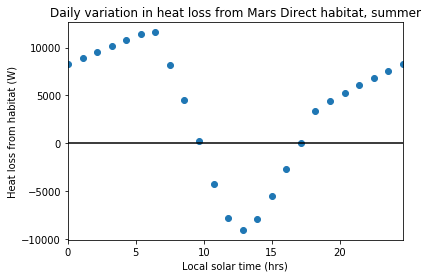

In [34]:
plt.figure(figsize=(6,4))

plt.scatter(mars_direct_hab_summer.times, MDH_S_heats)

plt.axhline(0, color='black')
plt.xlim(0, 24.65)

plt.xlabel("Local solar time (hrs)")
plt.ylabel("Heat loss from habitat (W)")
plt.title("Daily variation in heat loss from Mars Direct habitat, summer")

Text(0.5, 1.0, 'Daily variation in heat loss from 6m module, summer')

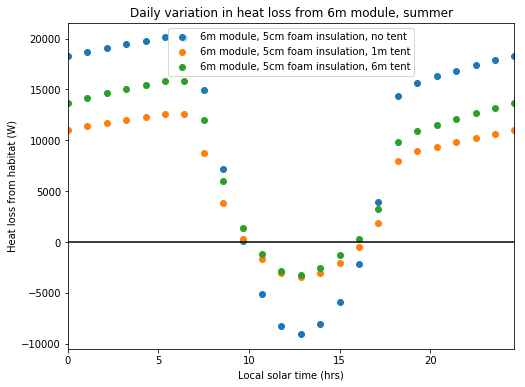

In [35]:
plt.figure(figsize=(8,6))

plt.scatter(mod_6m_summer.times, mod_6m_heats, label="6m module, 5cm foam insulation, no tent")
plt.scatter(mod_6m_summer.times, mod_6m_tent_heats, label="6m module, 5cm foam insulation, 1m tent")
plt.scatter(mod_6m_summer.times, mod_6m_tent_2_heats, label="6m module, 5cm foam insulation, 6m tent")

plt.legend()
plt.axhline(0, color='black')
plt.xlim(0, 24.65)

plt.xlabel("Local solar time (hrs)")
plt.ylabel("Heat loss from habitat (W)")
plt.title("Daily variation in heat loss from 6m module, summer")

In [36]:
print(mod_6m_reports[12], "\n \n", mod_6m_tent_reports[12], "\n \n", mod_6m_tent_2_reports[12])

{'Name': 'Curiosity landing area, Mount Sharp 12.86', 'Total heat flux out': -9041.616809117162, 'Outer wall temperature': 330.1840700992778, 'Inner wall temperature': 293.0, 'Convective loss from cylinder': 3888.4062452089584, 'Convective loss from endcap': 1281.4370192785163, 'Radiative loss to sky': 91347.60785675595, 'Radiative loss to ground': 91347.60785675595, 'Radiative gain from sky': -24200.64607925834, 'Radiative gain from ground': -62555.27702785314, 'Direct solar gain': -59483.52856983113, 'Reflected solar gain': -51109.22891633592, 'Conduction loss to ground': 442.0048061619832} 
 
 {'Name': 'Curiosity landing area, Mount Sharp 12.86', 'Total heat flux out': -3451.869187321397, 'Outer wall temperature': 329.9949189295425, 'Inner wall temperature': 293.0, 'Convective loss from cylinder': 5193.540468416598, 'Convective loss from endcap': 1814.6217045663007, 'Radiative loss to sky': 139692.8497736609, 'Radiative loss to ground': 139692.8497736609, 'Radiative gain from sky': 

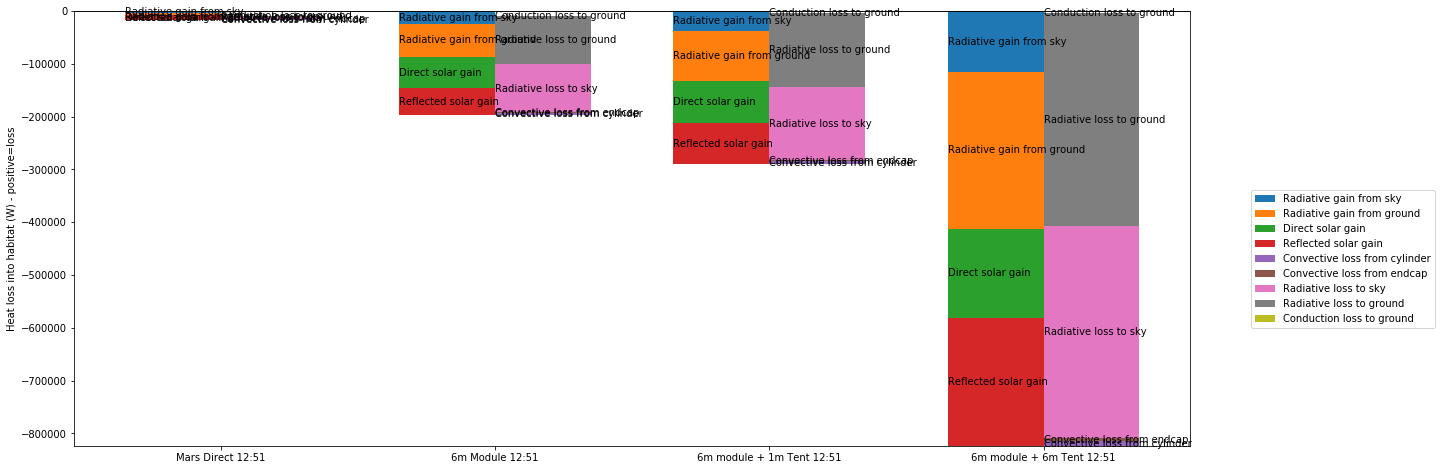

In [37]:
plt.figure(figsize=(20,8))
tools.plot_power_balance([MDH_S_reports[12], mod_6m_reports[12], mod_6m_tent_reports[12], mod_6m_tent_2_reports[12]], 
    labels=["Mars Direct 12:51", "6m Module 12:51", "6m module + 1m Tent 12:51", "6m module + 6m Tent 12:51"])